In [1]:
import os
from datetime import date

from pre_processing import *
from Classfile import *
import seaborn as sns
import matplotlib.pyplot as plt
from Support_Vector_Regression import *

from sklearn.decomposition import PCA

In [2]:
# output paths
#main = "C:/Users/alena/OneDrive/Work/PhD/Isochrone_Archive/Coding/"
main = "/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Isochrone_Archive/Coding/"

subdir = date.today()
output_path = os.path.join(main, str(subdir))
try:
    os.mkdir(output_path)
except FileExistsError:
    pass
output_path = output_path + "/"

In [3]:
Hyperparam_output = "/Users/alena/PycharmProjects/PaperI/data/Hyperparameters/"
data = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data_raw/Nuria_DANCe/"

## Cluster data import

#### NGC 2168

In [4]:
NGC2168 = data+"NGC_2168_w_plx.csv"

df_columns = ["Cluster", "plx", "gmag", "rmag", "imag", "zmag", "Jmag", "Hmag", "Kmag", "Mm"]
new_colnames = ["Cluster_id", "plx", "gmag", "rmag", "imag", "zmag", "Jmag", "Hmag", "Kmag", "membership"]

NGC2168_cluster, NGC2168_df = create_df(NGC2168, columns=df_columns, names=new_colnames)
NGC2168_df.replace(0, np.nan,inplace =True)
NGC2168_df = NGC2168_df[NGC2168_df["membership"] > 0.75]

#### Pleiades

In [5]:
Pleiades = data+"Pleiades_w_plx.csv"

df_columns = ["Cluster", "plx", "umag", "gmag", "rmag", "imag", "Ymag", "Jmag", "Hmag", "Kmag"]
new_colnames = ["Cluster_id", "plx", "umag", "gmag", "rmag", "imag", "ymag", "Jmag", "Hmag", "Kmag"]

Pleiades_cluster, Pleiades_df = create_df(Pleiades, columns=df_columns, names=new_colnames)

#### IC 4665

In [6]:
IC4665 = data + "IC_4665_w_plx.csv"

df_columns = ["Cluster", "median_plx", "g", "r", "i", "z", "y", "J", "H", "K"]
new_colnames = ["Cluster_id", "plx", "gmag", "rmag", "imag", "zmag", "ymag", "Jmag", "Hmag", "Kmag"]

IC4665_cluster, IC4665_df = create_df(IC4665, columns=df_columns, names=new_colnames)
IC4665_df.replace(99, np.nan,inplace =True)

In [7]:
# Data fusion
N_clusters = np.concatenate([IC4665_cluster, Pleiades_cluster, NGC2168_cluster])
N_df = pd.concat([IC4665_df, Pleiades_df, NGC2168_df], axis=0)

In [8]:
# Passband combinations
CMD_combis = [["rmag", "rmag", "imag"], ["imag", "imag", "zmag"], ["imag", "imag", "ymag"],
              ["imag", "imag", "Kmag"], ["ymag", "ymag", "Kmag"], ["Jmag", "Jmag", "Kmag"]]

In [9]:
params_1 = [{'C': 0.04281332398719394, 'epsilon': 0.03162277660168379, 'gamma': 'scale', 'kernel': 'rbf'},
{'C': 0.04281332398719394, 'epsilon': 0.029763514416313176, 'gamma': 'scale', 'kernel': 'rbf'},
{'C': 2.06913808111479, 'epsilon': 0.029763514416313176, 'gamma': 'scale', 'kernel': 'rbf'},
{'C': 100.0, 'epsilon': 0.01353876180022544, 'gamma': 'scale', 'kernel': 'rbf'},
{'C': 23.357214690901213, 'epsilon': 0.01438449888287663, 'gamma': 'scale', 'kernel': 'rbf'},
{'C': 0.7847599703514611, 'epsilon': 0.015283067326587688, 'gamma': 'scale', 'kernel': 'rbf'}]
params_2 = [{'C': 14.38449888287663, 'epsilon': 0.015283067326587688, 'gamma': 'scale', 'kernel': 'rbf'},
 {},
 {'C': 0.18329807108324356, 'epsilon': 0.029763514416313176, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 37.92690190732246, 'epsilon': 0.03162277660168379, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 0.18329807108324356, 'epsilon': 0.03162277660168379, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 0.29763514416313175, 'epsilon': 0.03162277660168379, 'gamma': 'scale', 'kernel': 'rbf'}]

params_3 = [{'C': 14.38449888287663, 'epsilon': 0.03162277660168379, 'gamma': 'scale', 'kernel': 'rbf'},
            {'C': 2.06913808111479, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'},
            {},
            #{'C': 14.38449888, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}, # 0.7
            {'C': 0.01, 'epsilon': 0.024816289228368264, 'gamma': 'scale', 'kernel': 'rbf'}, # 0.75
            {},
            {'C': 0.01, 'epsilon': 0.0206913808111479, 'gamma': 'scale', 'kernel': 'rbf'}
            ]

params = [params_1, params_2, params_3]

cuts_1 = [4,5,5,5,2,2]
cuts_2 = [2,7,7,7,4,3]
cuts_3 = [0,0,0,0,0,0]
cuts = [cuts_1, cuts_2, cuts_3]

In [10]:
DM_Pleiades =  5*np.log10(1000/7.346)+5
DM_IC_4665 =  5*np.log10(1000/2.85)+5
DM_NGC2168 =  5*np.log10(1000/1.131)+5
print(DM_NGC2168)

19.732686975372722


#### only new cluster

SVR Test score: 0.029621138103577027
SVR Test score: 0.012875062705235085
['imag', 'imag', 'ymag'] Value Error
SVR Test score: 0.025397993457280887
['ymag', 'ymag', 'Kmag'] Value Error
SVR Test score: 0.05211229007492135


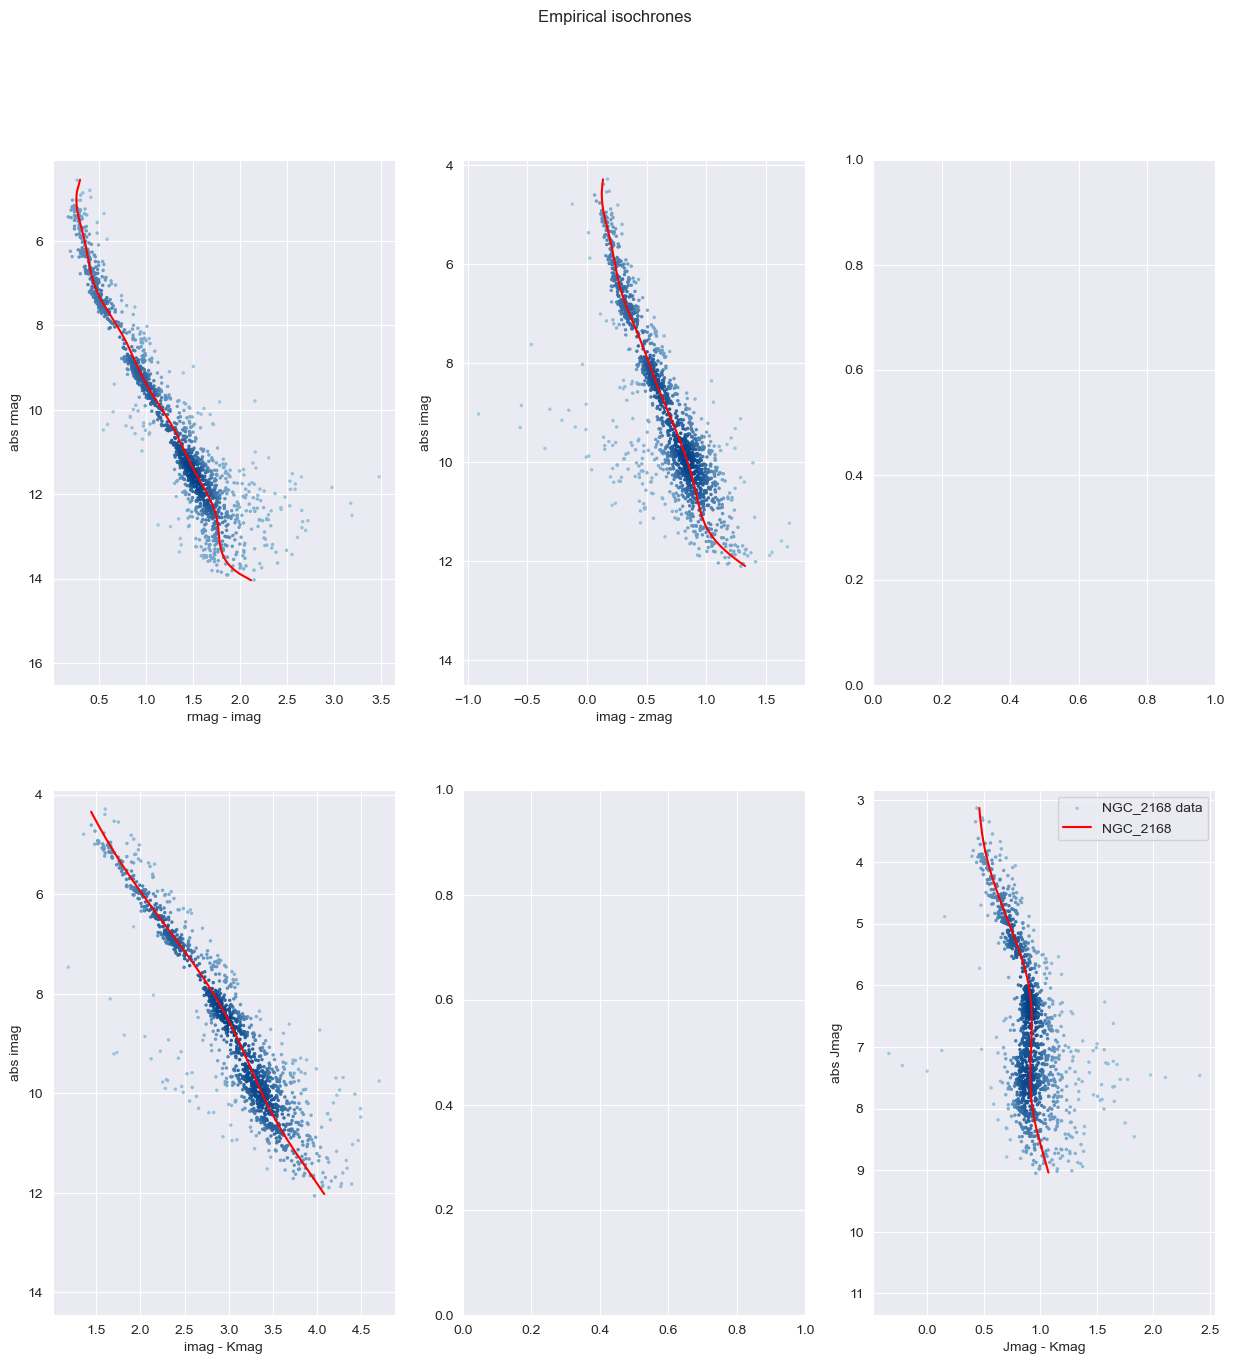

In [14]:
sns.set_style("darkgrid")
colors = ["red", "darkorange"]

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for k,filters in enumerate(CMD_combis[:]):
    try:
        OC = star_cluster(NGC2168_cluster[0], NGC2168_df, CMD_parameters=filters)

        pca = PCA(n_components=2)
        filtered_CMD = OC.CMD
        pca_arr = pca.fit_transform(filtered_CMD)

        #evals = np.logspace(-2, -1.5, 20)
        #Cvals = np.logspace(-2, 2, 20)
        #param_grid = dict(kernel=["rbf"], gamma=["scale"], C=Cvals, epsilon=evals)

        #params = SVR_Hyperparameter_tuning(pca_arr, param_grid, output_file= Hyperparam_output + "HP_Nuria_cluster.csv", further_data={ "c2" : filters[2], "c1" : filters[1],  "abs_mag" : filters[0], "name": OC.name})
        #print(params)

        svr = SVR(**params[2][k])

        svr_predict = pca_arr[:, 0].reshape(len(pca_arr[:, 0]), 1)

        X = pca_arr[:, 0].reshape(len(pca_arr[:, 0]), 1)
        Y = pca_arr[:, 1]

        Y_all = svr.fit(X, Y).predict(svr_predict)
        print("SVR Test score:", svr.score(svr_predict, Y.ravel()))

        SVR_all = np.stack([svr_predict[:, 0], Y_all], 1)
        SVR_all = SVR_all[SVR_all[:, 0].argsort()]
        rev_transform = pca.inverse_transform(SVR_all)
        kr = 0

        OC_density_x, OC_density_y, OC_kwargs = CMD_density_design([filtered_CMD[:, 0], filtered_CMD[:, 1]], density_plot=False)
        axes[k].scatter(OC_density_x, OC_density_y, label="NGC_2168 data", **OC_kwargs)

        axes[k].plot(rev_transform[kr:, 0], rev_transform[kr:, 1], color=colors[0], label="{}".format(OC.name))

        ymin, ymax = axes[k].get_ylim()
        axes[k].set_ylim(ymax+2, ymin)
        axes[k].set_ylabel(r"abs {}".format(filters[0]))
        axes[k].set_xlabel(r"{0} - {1}".format(filters[1],filters[2]))

    except KeyError:
        print( filters, "Value Error")

plt.suptitle("Empirical isochrones")
plt.legend(bbox_to_anchor=(1, 1), loc="upper right")

#fig1.show()
fig.savefig(output_path + "filter_NGC2168_p075.png", dpi=400)

#### All clusters

Pleiades ['imag', 'imag', 'zmag'] Value Error
NGC_2168 ['imag', 'imag', 'ymag'] Value Error
NGC_2168 ['ymag', 'ymag', 'Kmag'] Value Error


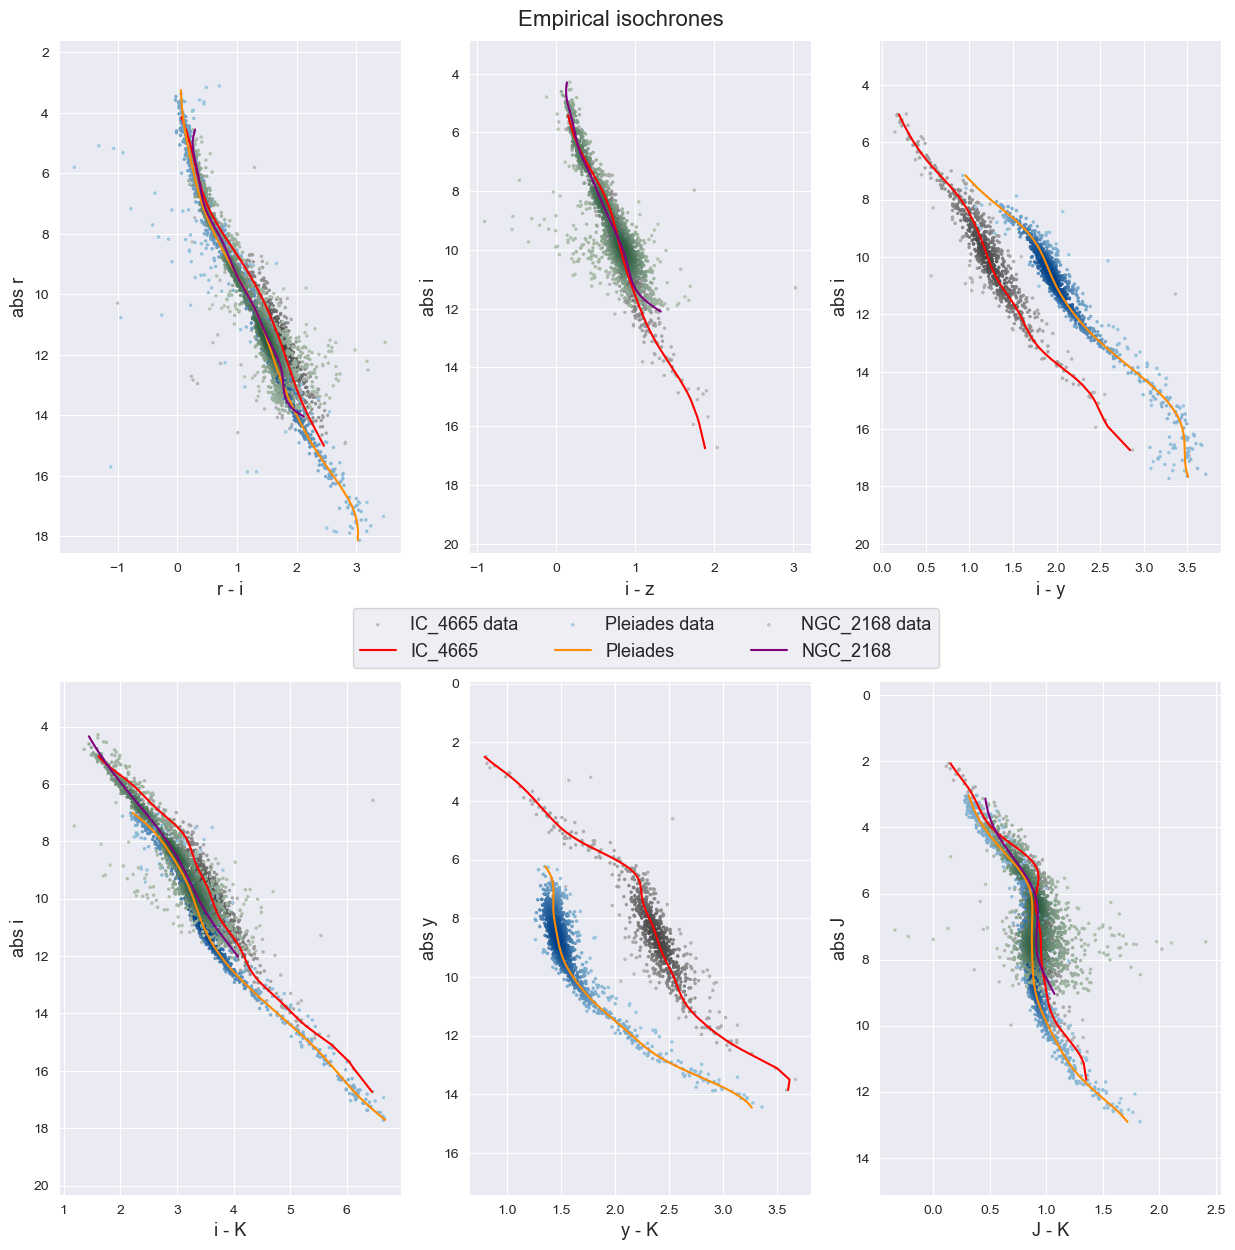

In [44]:
sns.set_style("darkgrid")
colors = ["red", "darkorange", "purple"]

from_color = [[0.74, 0.74, 0.74],[0.62, 0.79, 0.88],[0.72,0.78,0.71]]
to_color =[[0.27, 0.27, 0.27],[0.0, 0.25, 0.53],[0.17,0.36,0.25]]

fig1 = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for k,filters in enumerate(CMD_combis[:]):
    for i, cluster in enumerate(N_clusters[:]):
        try:
            OC = star_cluster(cluster, N_df, CMD_parameters=filters)
            OC.kwargs_CMD["s"] = 50

            pca = PCA(n_components=2)
            filtered_CMD = OC.CMD[OC.CMD[:,1] > cuts[i][k]]
            pca_arr = pca.fit_transform(filtered_CMD)

            #evals = np.logspace(-2, -1.5, 20)
            #Cvals = np.logspace(-2, 2, 20)
            #param_grid = dict(kernel=["rbf"], gamma=["scale"], C=Cvals, epsilon=evals)

            #params = SVR_Hyperparameter_tuning(pca_arr, param_grid, output_file= Hyperparam_output + "HP_Nuria_cluster.csv", further_data={ "c2" : filters[2], "c1" : filters[1],  "abs_mag" : filters[0], "name": OC.name})
            #print(params)

            svr = SVR(**params[i][k])
            svr_predict = pca_arr[:, 0].reshape(len(pca_arr[:, 0]), 1)

            X = pca_arr[:, 0].reshape(len(pca_arr[:, 0]), 1)
            Y = pca_arr[:, 1]

            Y_all = svr.fit(X, Y).predict(svr_predict)
            #print("SVR Test score:", svr.score(svr_predict, Y.ravel()))

            SVR_all = np.stack([svr_predict[:, 0], Y_all], 1)
            SVR_all = SVR_all[SVR_all[:, 0].argsort()]
            rev_transform = pca.inverse_transform(SVR_all)
            kr = 0

            OC_density_x, OC_density_y, OC_kwargs = CMD_density_design([filtered_CMD[:, 0], filtered_CMD[:, 1]], to_RBG=to_color[i], from_RBG=from_color[i], density_plot=False)
            axes[k].scatter(OC_density_x, OC_density_y, label="{} data".format(OC.name), **OC_kwargs)
            axes[k].plot(rev_transform[kr:, 0], rev_transform[kr:, 1], color=colors[i], label="{}".format(OC.name))

            ymin, ymax = axes[k].get_ylim()
            if i==0:
                axes[k].set_ylim(ymax+3, ymin-2)

            axes[k].set_ylabel(r"abs {}".format(filters[0].replace("mag","")), fontsize = 13)
            axes[k].set_xlabel(r"{0} - {1}".format(filters[1].replace("mag",""),filters[2].replace("mag","")), fontsize = 13)
            h=+1
            # ax2.legend(loc="best", fontsize=16)
        except ValueError:
            print(cluster, filters, "Value Error")
            h=+1

plt.subplots_adjust(hspace=0.25)
plt.suptitle("Empirical isochrones", fontsize = 16, y = 0.9)
plt.legend(bbox_to_anchor=(-0.8,0.16,1, 1), loc="upper right", ncol =3, fontsize = 13)

fig1.savefig(output_path+"All_filters_data.png", dpi = 500)

#### Only isochrones

Pleiades ['imag', 'imag', 'zmag'] Value Error
NGC_2168 ['imag', 'imag', 'ymag'] Value Error
NGC_2168 ['ymag', 'ymag', 'Kmag'] Value Error


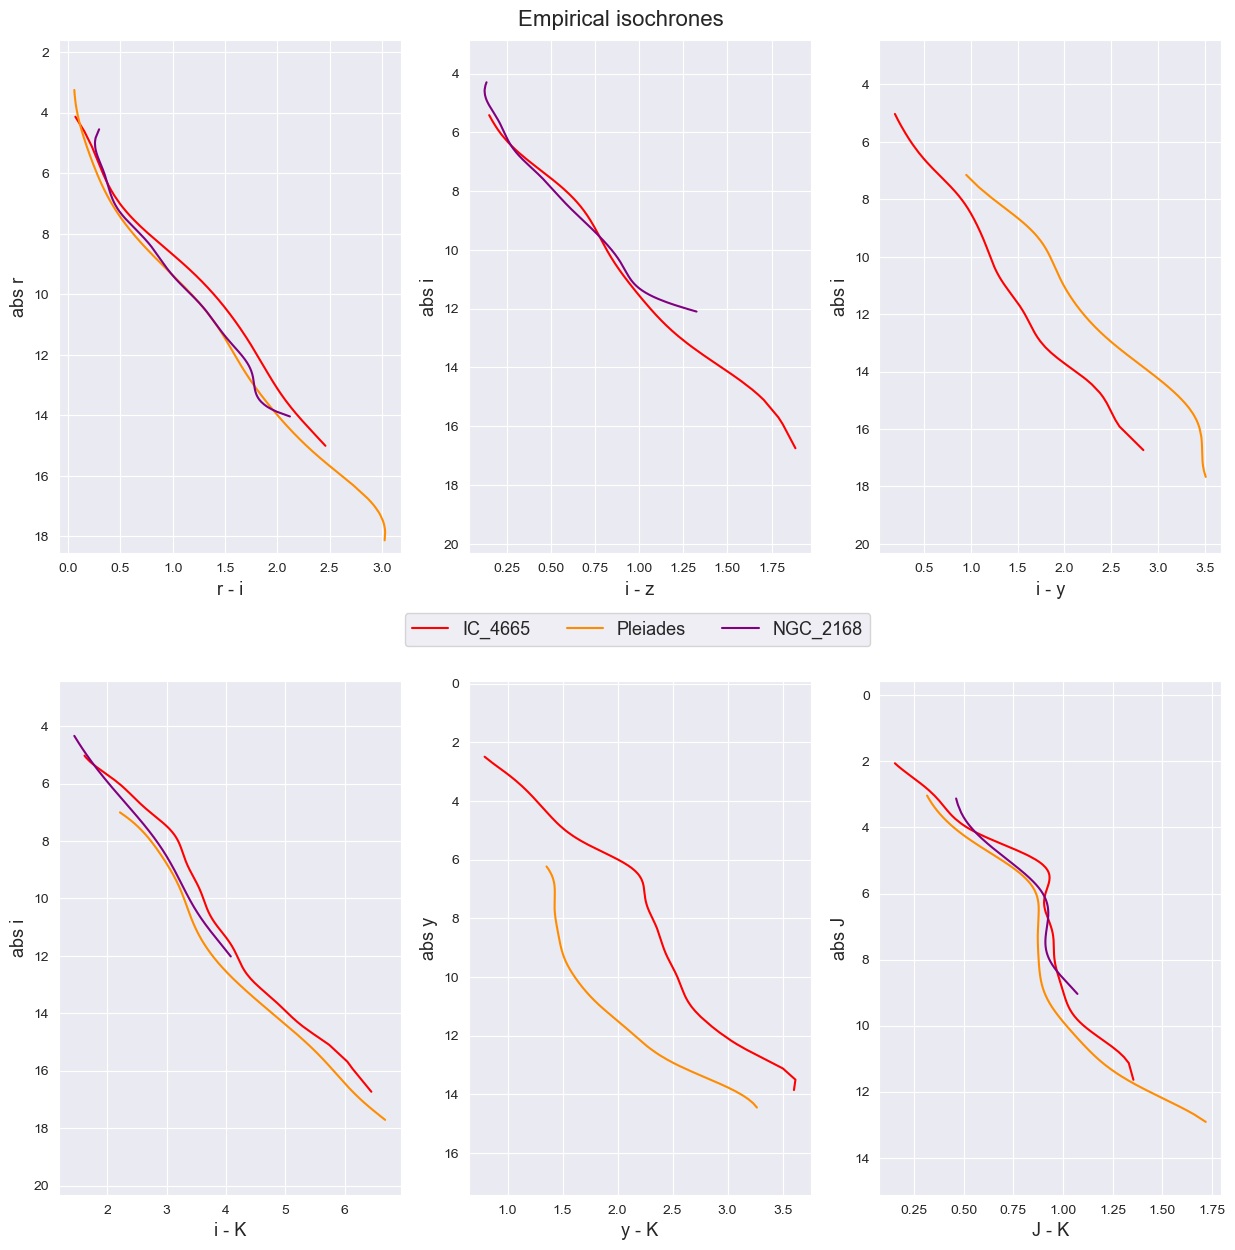

In [47]:
sns.set_style("darkgrid")
colors = ["red", "darkorange", "purple"]

from_color = [[0.74, 0.74, 0.74],[0.62, 0.79, 0.88],[0.72,0.78,0.71]]
to_color =[[0.27, 0.27, 0.27],[0.0, 0.25, 0.53],[0.17,0.36,0.25]]

fig2 = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 0))
ax5 = plt.subplot2grid((2, 3), (1, 1))
ax6 = plt.subplot2grid((2, 3), (1, 2))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for k,filters in enumerate(CMD_combis[:]):
    for i, cluster in enumerate(N_clusters[:]):
        try:
            OC = star_cluster(cluster, N_df, CMD_parameters=filters)
            OC.kwargs_CMD["s"] = 50

            pca = PCA(n_components=2)
            filtered_CMD = OC.CMD[OC.CMD[:,1] > cuts[i][k]]
            pca_arr = pca.fit_transform(filtered_CMD)

            #evals = np.logspace(-2, -1.5, 20)
            #Cvals = np.logspace(-2, 2, 20)
            #param_grid = dict(kernel=["rbf"], gamma=["scale"], C=Cvals, epsilon=evals)

            #params = SVR_Hyperparameter_tuning(pca_arr, param_grid, output_file= Hyperparam_output + "HP_Nuria_cluster.csv", further_data={ "c2" : filters[2], "c1" : filters[1],  "abs_mag" : filters[0], "name": OC.name})
            #print(params)

            svr = SVR(**params[i][k])
            svr_predict = pca_arr[:, 0].reshape(len(pca_arr[:, 0]), 1)

            X = pca_arr[:, 0].reshape(len(pca_arr[:, 0]), 1)
            Y = pca_arr[:, 1]

            Y_all = svr.fit(X, Y).predict(svr_predict)
            #print("SVR Test score:", svr.score(svr_predict, Y.ravel()))

            SVR_all = np.stack([svr_predict[:, 0], Y_all], 1)
            SVR_all = SVR_all[SVR_all[:, 0].argsort()]
            rev_transform = pca.inverse_transform(SVR_all)
            kr = 0

            #OC_density_x, OC_density_y, OC_kwargs = CMD_density_design([filtered_CMD[:, 0], filtered_CMD[:, 1]], to_RBG=to_color[i], from_RBG=from_color[i], density_plot=False)
            #axes[k].scatter(OC_density_x, OC_density_y, label="{} data".format(OC.name), **OC_kwargs)
            axes[k].plot(rev_transform[kr:, 0], rev_transform[kr:, 1], color=colors[i], label="{}".format(OC.name))

            ymin, ymax = axes[k].get_ylim()
            if i==0:
                axes[k].set_ylim(ymax+3, ymin-2)

            axes[k].set_ylabel(r"abs {}".format(filters[0].replace("mag","")), fontsize = 13)
            axes[k].set_xlabel(r"{0} - {1}".format(filters[1].replace("mag",""),filters[2].replace("mag","")), fontsize = 13)
            h=+1
            # ax2.legend(loc="best", fontsize=16)
        except ValueError:
            print(cluster, filters, "Value Error")
            h=+1

plt.subplots_adjust(hspace=0.25)
plt.suptitle("Empirical isochrones", fontsize = 16, y = 0.9)
plt.legend(bbox_to_anchor=(-1,0.15,1, 1), loc="upper right", ncol =3, fontsize = 13)

fig2.savefig(output_path+"All_filters.png", dpi = 500)